In [163]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [164]:
df=pd.read_csv('file:///F:/telecom_users.csv')
df.head()

Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        1869  7010-BRBUU    Male              0     Yes        Yes      72   
1        4528  9688-YGXVR  Female              0      No         No      44   
2        6344  9286-DOJGF  Female              1     Yes         No      38   
3        6739  6994-KERXL    Male              0      No         No       4   
4         432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService  ...     DeviceProtection  \
0          Yes           Yes              No  ...  No internet service   
1          Yes            No     Fiber optic  ...                  Yes   
2          Yes           Yes     Fiber optic  ...                   No   
3          Yes            No             DSL  ...                   No   
4          Yes            No             DSL  ...                  Yes   

           TechSupport          StreamingTV      StreamingMovies  \
0  No internet service  No internet service  No internet service   
1                   No                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                  Yes   
4                   No                   No                   No   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0        Two year               No    Credit card (automatic)          24.10   
1  Month-to-month              Yes    Credit card (automatic)          88.15   
2  Month-to-month              Yes  Bank transfer (automatic)          74.95   
3  Month-to-month              Yes           Electronic check          55.90   
4  Month-to-month               No           Electronic check          53.45   

  TotalCharges  Churn  
0      1734.65     No  
1       3973.2     No  
2      2869.85    Yes  
3        238.5     No  
4        119.5     No  

[5 rows x 22 columns]

In [165]:
df.shape

(5986, 22)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [167]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [168]:
df=df.drop(['Unnamed: 0', 'customerID'],axis='columns')
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male              0     Yes        Yes      72          Yes   
1  Female              0      No         No      44          Yes   
2  Female              1     Yes         No      38          Yes   
3    Male              0      No         No       4          Yes   
4    Male              0      No         No       2          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes              No  No internet service  No internet service   
1            No     Fiber optic                   No                  Yes   
2           Yes     Fiber optic                   No                   No   
3            No             DSL                   No                   No   
4            No             DSL                  Yes                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                   No                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                   No   

       StreamingMovies        Contract PaperlessBilling  \
0  No internet service        Two year               No   
1                   No  Month-to-month              Yes   
2                   No  Month-to-month              Yes   
3                  Yes  Month-to-month              Yes   
4                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No

In [169]:
df['InternetService'].value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

In [170]:
df['InternetService']=df['InternetService'].replace('Fiber optic', 2)
df['InternetService']=df['InternetService'].replace('DSL', 1)

In [171]:
df['InternetService']

0       No
1        2
2        2
3        1
4        1
        ..
5981     2
5982     1
5983    No
5984     2
5985    No
Name: InternetService, Length: 5986, dtype: object

In [172]:
df['Contract'].value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [173]:
df['Contract']=df['Contract'].replace('Two year',24)
df['Contract']=df['Contract'].replace('One year',12)
df['Contract']=df['Contract'].replace('Month-to-month', 1)

In [174]:
df['Contract']

0       24
1        1
2        1
3        1
4        1
        ..
5981     1
5982    24
5983     1
5984     1
5985    12
Name: Contract, Length: 5986, dtype: int64

In [175]:
df['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [176]:
df['PaymentMethod']=df['PaymentMethod'].replace('Electronic check', 1)
df['PaymentMethod']=df['PaymentMethod'].replace('Mailed check', 2)
df['PaymentMethod']=df['PaymentMethod'].replace('Bank transfer (automatic)', 3)
df['PaymentMethod']=df['PaymentMethod'].replace('Credit card (automatic)', 4)

df['MultipleLines']=df['MultipleLines'].replace('No phone service', 0)


In [177]:
df['gender']=df['gender'].replace('Male', 1)
df['gender']=df['gender'].replace('Female', 0)

In [178]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [179]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       1              0     Yes        Yes      72          Yes   
1       0              0      No         No      44          Yes   
2       0              1     Yes         No      38          Yes   
3       1              0      No         No       4          Yes   
4       1              0      No         No       2          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes              No  No internet service  No internet service   
1            No               2                   No                  Yes   
2           Yes               2                   No                   No   
3            No               1                   No                   No   
4            No               1                  Yes                   No   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                   No                   No                   No   
3                   No                   No                   No   
4                  Yes                   No                   No   

       StreamingMovies  Contract PaperlessBilling  PaymentMethod  \
0  No internet service        24               No              4   
1                   No         1              Yes              4   
2                   No         1              Yes              3   
3                  Yes         1              Yes              1   
4                   No         1               No              1   

   MonthlyCharges TotalCharges Churn  
0           24.10      1734.65    No  
1           88.15       3973.2    No  
2           74.95      2869.85   Yes  
3           55.90        238.5    No  
4           53.45        119.5    No

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
le=LabelEncoder()
df_col=('Partner','Dependents','PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn')
       
      

In [182]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [183]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   
3       1              0        0           0       4             1   
4       1              0        0           0       2             1   

  MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0           Yes              No               1             1   
1            No               2               0             2   
2           Yes               2               0             0   
3            No               1               0             0   
4            No               1               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1        24   
1                 2            0            2                0         1   
2                 0            0            0                0         1   
3                 0            0            0                2         1   
4                 2            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges TotalCharges  Churn  
0                 0              4           24.10      1734.65      0  
1                 1              4           88.15       3973.2      0  
2                 1              3           74.95      2869.85      1  
3                 1              1           55.90        238.5      0  
4                 0              1           53.45        119.5      0

In [184]:

df['MultipleLines'].value_counts()

No     2848
Yes    2548
0       590
Name: MultipleLines, dtype: int64

In [185]:
df['InternetService'].value_counts()

2     2627
1     2068
No    1291
Name: InternetService, dtype: int64

In [186]:
df=df.drop(['InternetService','MultipleLines','MonthlyCharges','TotalCharges'],axis='columns')

In [187]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   
3       1              0        0           0       4             1   
4       1              0        0           0       2             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               1             1                 1            1            1   
1               0             2                 2            0            2   
2               0             0                 0            0            0   
3               0             0                 0            0            0   
4               2             0                 2            0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Churn  
0                1        24                 0              4      0  
1                0         1                 1              4      0  
2                0         1                 1              3      1  
3                2         1                 1              1      0  
4                0         1                 0              1      0

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            5986 non-null   int64
 1   SeniorCitizen     5986 non-null   int64
 2   Partner           5986 non-null   int32
 3   Dependents        5986 non-null   int32
 4   tenure            5986 non-null   int64
 5   PhoneService      5986 non-null   int32
 6   OnlineSecurity    5986 non-null   int32
 7   OnlineBackup      5986 non-null   int32
 8   DeviceProtection  5986 non-null   int32
 9   TechSupport       5986 non-null   int32
 10  StreamingTV       5986 non-null   int32
 11  StreamingMovies   5986 non-null   int32
 12  Contract          5986 non-null   int64
 13  PaperlessBilling  5986 non-null   int32
 14  PaymentMethod     5986 non-null   int64
 15  Churn             5986 non-null   int32
dtypes: int32(11), int64(5)
memory usage: 491.2 KB


In [189]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [192]:
corr = df.corr()

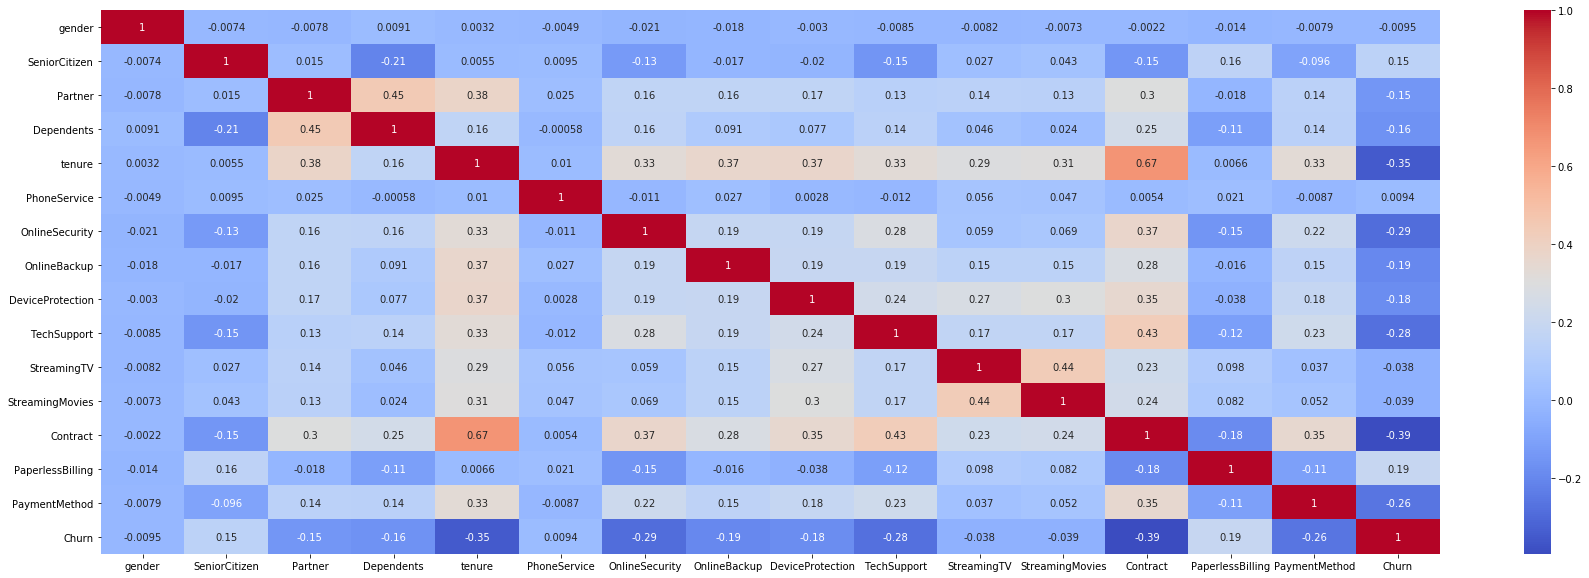

In [193]:
plt.figure(figsize=(30,10))
sns.heatmap(corr,cmap='coolwarm', annot = True)

In [194]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [195]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [196]:
x = df.drop(['Churn'], axis=1)
y = df.Churn.values

In [197]:
x.shape, y.shape

((5986, 15), (5986,))

In [198]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [199]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pre_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pre_lo)
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7984409799554566

In [212]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [203]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pre_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pre_tre)
accu_tre

0.7249443207126949

In [211]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)
pre_rdf=rdf.predict(xtest)
accu_rdf=accuracy_score(ytest,pre_tre)
accu_rdf


0.7249443207126949

In [210]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [213]:
from sklearn.naive_bayes import MultinomialNB

In [214]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
pre_mnb=mnb.predict(xtest)
accu_mnb=accuracy_score(ytest,pre_mnb)
accu_mnb

0.670935412026726

In [215]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [216]:
from sklearn.naive_bayes import GaussianNB

In [217]:
gnm=GaussianNB()
gnm.fit(xtrain,ytrain)
pre_gnm=gnm.predict(xtest)
accu_gnm=accuracy_score(ytest,pre_gnm)
accu_gnm

0.75

In [218]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [219]:
from sklearn.svm import SVC

In [220]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)
accu_svc

0.7616926503340757

In [221]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [222]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_svc)
accu_rnd

0.7683741648106904

In [225]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1316
           1       0.48      0.46      0.47       480

    accuracy                           0.72      1796
   macro avg       0.65      0.64      0.64      1796
weighted avg       0.72      0.72      0.72      1796



In [226]:
import sweetviz as sv

In [227]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [229]:
from IPython.display import IFrame

In [230]:
IFrame(src='Analyze.html',width=1000,height=600)

In [231]:
from dataprep.eda import *

  0%|          | 0/2511 [00:00<?, ?it/s]

DataPrep Report
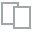
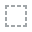
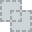
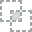
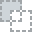
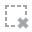
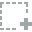
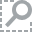
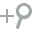
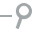
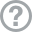
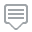
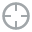
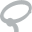
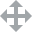
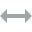
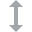
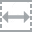
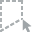
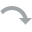
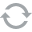
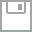
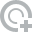
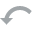
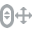
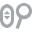
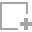
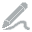
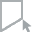
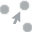
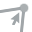
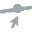

In [232]:
create_report(df)

In [233]:
from sklearn.preprocessing import MinMaxScaler

In [234]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [235]:
man=MinMaxScaler()
feat=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']
df[feat]=man.fit_transform(df[feat])
df[feat]

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        1.0            0.0      1.0         1.0  1.000000           1.0   
1        0.0            0.0      0.0         0.0  0.611111           1.0   
2        0.0            1.0      1.0         0.0  0.527778           1.0   
3        1.0            0.0      0.0         0.0  0.055556           1.0   
4        1.0            0.0      0.0         0.0  0.027778           1.0   
...      ...            ...      ...         ...       ...           ...   
5981     1.0            0.0      1.0         0.0  0.013889           1.0   
5982     0.0            0.0      1.0         1.0  0.319444           1.0   
5983     1.0            0.0      1.0         1.0  0.166667           1.0   
5984     1.0            1.0      0.0         0.0  0.166667           1.0   
5985     1.0            0.0      0.0         0.0  0.361111           1.0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0                0.5           0.5               0.5          0.5   
1                0.0           1.0               1.0          0.0   
2                0.0           0.0               0.0          0.0   
3                0.0           0.0               0.0          0.0   
4                1.0           0.0               1.0          0.0   
...              ...           ...               ...          ...   
5981             1.0           0.0               0.0          0.0   
5982             1.0           1.0               1.0          1.0   
5983             0.5           0.5               0.5          0.5   
5984             0.0           0.0               1.0          0.0   
5985             0.5           0.5               0.5          0.5   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0             0.5              0.5  1.000000               0.0       1.000000   
1             1.0              0.0  0.000000               1.0       1.000000   
2             0.0              0.0  0.000000               1.0       0.666667   
3             0.0              1.0  0.000000               1.0       0.000000   
4             0.0              0.0  0.000000               0.0       0.000000   
...           ...              ...       ...               ...            ...   
5981          1.0              1.0  0.000000               1.0       0.000000   
5982          1.0              1.0  1.000000               1.0       1.000000   
5983          0.5              0.5  0.000000               1.0       0.000000   
5984          1.0              1.0  0.000000               1.0       0.000000   
5985          0.5              0.5  0.478261               0.0       1.000000   

      Churn  
0       0.0  
1       0.0  
2       1.0  
3       0.0  
4       0.0  
...     ...  
5981    1.0  
5982    0.0  
5983    0.0  
5984    1.0  
5985    0.0  

[5986 rows x 16 columns]

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
sdc=StandardScaler()
feat=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']
df[feat]=sdc.fit_transform(df[feat])
df[feat]

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0     0.981134      -0.438669  1.030192    1.530447  1.612576      0.330666   
1    -1.019229      -0.438669 -0.970693   -0.653404  0.470387      0.330666   
2    -1.019229       2.279624  1.030192   -0.653404  0.225633      0.330666   
3     0.981134      -0.438669 -0.970693   -0.653404 -1.161310      0.330666   
4     0.981134      -0.438669 -0.970693   -0.653404 -1.242895      0.330666   
...        ...            ...       ...         ...       ...           ...   
5981  0.981134      -0.438669  1.030192   -0.653404 -1.283688      0.330666   
5982 -1.019229      -0.438669  1.030192    1.530447 -0.386254      0.330666   
5983  0.981134      -0.438669  1.030192    1.530447 -0.834971      0.330666   
5984  0.981134       2.279624 -0.970693   -0.653404 -0.834971      0.330666   
5985  0.981134      -0.438669 -0.970693   -0.653404 -0.263877      0.330666   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0           0.246541      0.097607          0.111027     0.237501   
1          -0.916416      1.232120          1.247113    -0.923055   
2          -0.916416     -1.036906         -1.025058    -0.923055   
3          -0.916416     -1.036906         -1.025058    -0.923055   
4           1.409498     -1.036906          1.247113    -0.923055   
...              ...           ...               ...          ...   
5981        1.409498     -1.036906         -1.025058    -0.923055   
5982        1.409498      1.232120          1.247113     1.398057   
5983        0.246541      0.097607          0.111027     0.237501   
5984       -0.916416     -1.036906          1.247113    -0.923055   
5985        0.246541      0.097607          0.111027     0.237501   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0        0.015658         0.003207  1.584676         -1.198046       1.461837   
1        1.144944        -1.125946 -0.826124          0.834693       1.461837   
2       -1.113627        -1.125946 -0.826124          0.834693       0.592346   
3       -1.113627         1.132360 -0.826124          0.834693      -1.146636   
4       -1.113627        -1.125946 -0.826124         -1.198046      -1.146636   
...           ...              ...       ...               ...            ...   
5981     1.144944         1.132360 -0.826124          0.834693      -1.146636   
5982     1.144944         1.132360  1.584676          0.834693       1.461837   
5983     0.015658         0.003207 -0.826124          0.834693      -1.146636   
5984     1.144944         1.132360 -0.826124          0.834693      -1.146636   
5985     0.015658         0.003207  0.326867         -1.198046       1.461837   

         Churn  
0    -0.600636  
1    -0.600636  
2     1.664901  
3    -0.600636  
4    -0.600636  
...        ...  
5981  1.664901  
5982 -0.600636  
5983 -0.600636  
5984  1.664901  
5985 -0.600636  

[5986 rows x 16 columns]